# Projeto Supercomputação - TSP

O objetivo deste projeto será comparar 2 diferentes implementações paralelas de busca local para o problema do Travel Salesman Problem: 
* Paralelismo multi-core
* Paralelismo em GPU 

OBS: Para deixar o algoritmo mais rápido, as antigas implementações foram alteradas para realizar a troca comparando apenas com o primeiro índice

## Setup

### Compilando os códigos

In [1]:
import subprocess

# Compile C++ code for global search
#subprocess.call(["g++", "-std=c++11", "-o", "busca-exaustiva", "busca-exaustiva/main.cpp"])

# Compile C++ busca local normal code
subprocess.call(["g++", "-std=c++11", "-o", "busca-local-sequencial", "busca-local-sequencial.cpp"])

# Compile C++ busca local com openmp
subprocess.call(["g++", "-std=c++11", "-fopenmp", "-o", "busca-local-cpu", "busca-local-cpu.cpp"])

# Compile C++ busca local com CUDA
subprocess.call(["nvcc", "-arch=sm_70", "-std=c++14", "-o", "busca-local-gpu", "busca-local-gpu.cu"])

busca-local-gpu.cu(80): warning: reference is to variable "i"
(65): here -- under old for-init scoping rules it would have been variable "i"
(70): here

busca-local-gpu.cu(80): warning: reference is to variable "i"
(65): here -- under old for-init scoping rules it would have been variable "i"
(70): here

busca-local-gpu.cu(80): warning: reference is to variable "i"
(65): here -- under old for-init scoping rules it would have been variable "i"
(70): here

busca-local-gpu.cu(80): warning: reference is to variable "i"
(65): here -- under old for-init scoping rules it would have been variable "i"
(70): here



0

In [4]:
import time
from subprocess import Popen, PIPE
def run(exec, entrada):
    start = time.perf_counter()
    command = "./" + exec + " < " + entrada
    process = Popen(command, stdin=PIPE, stdout=PIPE, stderr=PIPE, shell=True)
    stdout, stderr = process.communicate()
    end = time.perf_counter()
    return end - start

def run_all(exec, entradas):
    times = []
    for entrada in entradas:
        times.append(run(exec, entrada))
    return times

entradas = ["entradas/in-{}.txt".format(i) for i in range(150)]

In [8]:
# busca local sequencial
times_busca_local_sequencial = run_all("busca-local-sequencial", entradas)

In [5]:
# busca local com openmp
times_busca_local_cpu = run_all("busca-local-cpu", entradas)

In [6]:
# busca local com CUDA
times_busca_local_gpu = run_all("busca-local-gpu", entradas)


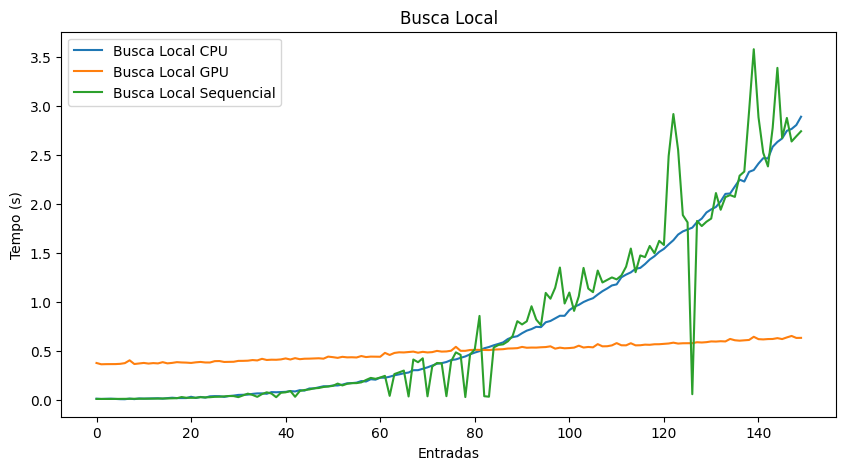

In [15]:
import matplotlib.pyplot as plt
import numpy as np

times = [times_busca_local_cpu, times_busca_local_gpu, x]

# plot all in one figure
def plot_all(times, title ):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.xlabel("Entradas")
    plt.ylabel("Tempo (s)")
    plt.plot(times[0], label="Busca Local CPU")
    plt.plot(times[1], label="Busca Local GPU")
    plt.plot(times[2], label="Busca Local Sequencial")
    plt.legend()
    plt.show()

plot_all(times, "Busca Local")


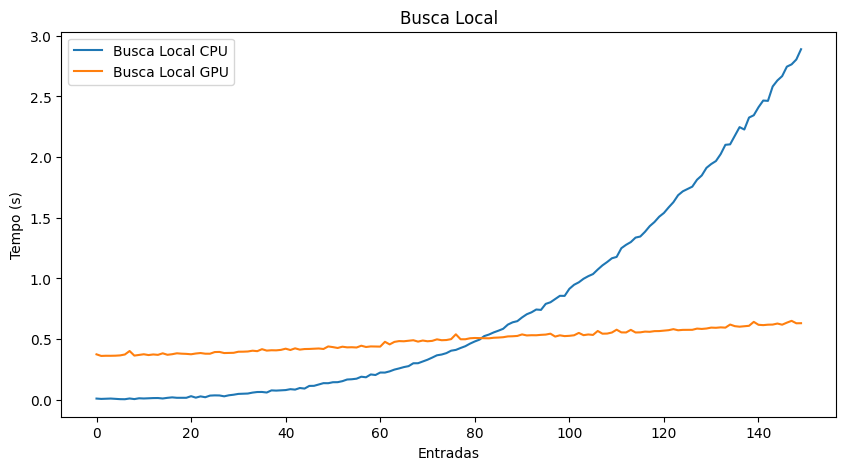

In [16]:
# plot all in one figure
def plot_all(times, title ):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.xlabel("Entradas")
    plt.ylabel("Tempo (s)")
    plt.plot(times[0], label="Busca Local CPU")
    plt.plot(times[1], label="Busca Local GPU")
    plt.legend()
    plt.show()

plot_all(times, "Busca Local")

In [13]:
x = [0.008053960999999998, 0.007792389999999982, 0.00790457499999997, 0.008082267000000032, 0.008329072999999965, 0.008233960999999956, 0.008380440000000045, 0.008576762999999987, 0.008937307000000061, 0.009590487999999953, 0.009926769999999974, 0.010362757, 0.011401384000000014, 0.011826081000000044, 0.012331941999999985, 0.013205489999999931, 0.014369340000000008, 0.015671018000000037, 0.027501898999999996, 0.020049211999999983, 0.019475715000000005, 0.020640323999999932, 0.025733322000000003, 0.02419313700000003, 0.02585450999999994, 0.029613351000000065, 0.030726264999999975, 0.034231538999999866, 0.037919652000000026, 0.03732580800000007, 0.02660832000000002, 0.04398948100000011, 0.06216922999999985, 0.048998101000000016, 0.029474957999999996, 0.05758738200000013, 0.07573451999999992, 0.06340796199999987, 0.025962022999999945, 0.07124563200000011, 0.0756387839999999, 0.08936303500000009, 0.030130487999999955, 0.08942139199999999, 0.09942479999999998, 0.10478240300000019, 0.11622251899999991, 0.11971802400000042, 0.1301043670000004, 0.13522794000000005, 0.14171302100000016, 0.16506103799999972, 0.14614778100000025, 0.16249648100000025, 0.1692836289999997, 0.16971779699999967, 0.17738105199999987, 0.20166737800000023, 0.2229743919999998, 0.21350702899999963, 0.22652296399999994, 0.2439030020000006, 0.03958230000000018, 0.26234847599999966, 0.27932431300000005, 0.2977592359999992, 0.033402406999999634, 0.41057456100000067, 0.38294526999999956, 0.42284119599999936, 0.03497179799999994, 0.33935161099999966, 0.3752357899999996, 0.3701934530000006, 0.03634390999999937, 0.3926945429999993, 0.48344491399999967, 0.45794828800000076, 0.02732353500000073, 0.4612534100000012, 0.514178428000001, 0.8555468089999998, 0.03596404199999981, 0.030947704000000797, 0.5335738600000006, 0.5587478560000001, 0.5656115079999999, 0.5965337290000008, 0.650980177000001, 0.8018919980000003, 0.7685680489999989, 0.8007338410000013, 0.9541686059999996, 0.8182199789999984, 0.7612743659999985, 1.0903553200000005, 1.0311956870000003, 1.1427816430000028, 1.3498024970000024, 0.9823037639999974, 1.0941355259999987, 0.9069517349999998, 1.0558501870000008, 1.3456876120000025, 1.1346326599999976, 1.0981740739999992, 1.3184240490000008, 1.196943350000005, 1.2223136770000025, 1.248570891, 1.2283881809999997, 1.2681331089999972, 1.3581245829999986, 1.5432360380000034, 1.3019115990000003, 1.4729654980000007, 1.4557715540000018, 1.5696889879999958, 1.4951801750000016, 1.6215706639999965, 1.579432623999999, 2.487148421999997, 2.9161476439999987, 2.5500912319999998, 1.8845152170000006, 1.8104082190000028, 0.05651250899999383, 1.8247191299999912, 1.772783129000004, 1.8172269660000069, 1.849282402, 2.109764963999993, 1.9391010739999928, 2.0686322190000084, 2.0889084629999957, 2.07031442200001, 2.286223604, 2.3290791350000006, 2.9394646169999987, 3.5777996839999986, 2.8845838139999955, 2.5205886539999938, 2.381479482000003, 2.775329794000001, 3.3874870269999917, 2.671599895, 2.8765556879999963, 2.6361249339999944, 2.6892728079999983, 2.740564230000004]

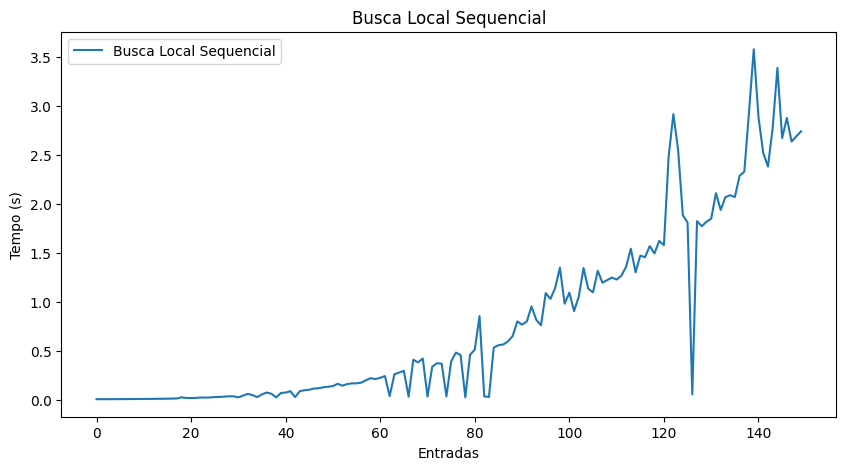

In [14]:
def plot(times, title):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.xlabel("Entradas")
    plt.ylabel("Tempo (s)")
    plt.plot(times[0], label="Busca Local Sequencial")
    plt.legend()
    plt.show()

plot([x], "Busca Local Sequencial")

## Comparando o desempenho das implementações

### Se você pudesse escolher um método para resolver este problema, qual seria?

O método escolhido dependeria do tamanho da entrada. Observa-se no gráfico acima que para entradas maiores, a GPU se sai melhor. Já para entradas menores, a melhor escolha seria a implementação paralelizada da busca local, uma vez que obteve tempos bem menores.


### Valeria a pena gastar dinheiro comprando uma CPU com mais cores ou uma GPU potente?


Depende das necessidades do usuário. Se ele necessita lidar com pouco volume de dados, a melhor opção seria uma implementação paralelizada na própria CPU. Caso ele lide com um volume de dados alto, a melhor escolha, sem dúvidas é realizar a implementação na GPU.

### Vale a pena esperar pelo resultado da busca exaustiva?

Sim, na busca exaustiva são feitas inúmeras operações idênticas para encontrar todos as possíveis combinações. Dito isso, a implementação paralelizada em gpu traria bons resultados em entradas maiores, ao contrário da CPU que tem sua capacidade de processar dados levada ao limite, tornando a implementação lenta e pouco eficiente para entradas maiores.